# Fermat's Principle of "Least Time"

Fermat's principle states that light rays propagate from one point to another in a way which minimizes the optical path. However as [wikipedia](https://en.wikipedia.org/wiki/Fermat%27s_principle) notes a more modern version states that light travels a "stationary path" of optical length.

Looking more in to this I wondered if you could have an extremum which was a maximum, rather than a minimum. [A closer look at Fermat's principle by Mak Se-yuen](http://iopscience.iop.org/article/10.1088/0031-9120/21/6/005) provides some good examples. However, as the [Feynman lectures](http://www.feynmanlectures.caltech.edu/I_26.html) point out, the problem with this is that any number of nonsensical loops or curves can be added to make any "maximum" path even longer.

> Actually, we must make the statement of the principle of least time a little more accurately. It was not stated correctly above. It is incorrectly called the principle of least time and we have gone along with the incorrect description for convenience, but we must now see what the correct statement is. Suppose we had a mirror as in Fig. 26–3. What makes the light think it has to go to the mirror? The path of least time is clearly AB. So some people might say, “Sometimes it is a maximum time.” **It is not a maximum time, because certainly a curved path would take a still longer time!**

What I want to find is a **specific example where the more precise statement** matters, and to get a better general understanding Fermat's Principle.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

plt.style.use('ggplot') 

In [3]:
radius = 5 #radius of spherical mirror
source = np.array((-5,radius/8)) #origin of light ray
destination = np.array((radius/2, -1)) #point light ends up
sphere = lambda theta, r: np.array((r*np.cos(theta), r*np.sin(theta))) 

In [4]:
theta = np.linspace(-np.pi/2, np.pi/2, 400)
#theta = np.linspace(-0.2,0.2,20)
mirror = sphere(theta, radius)
mirror = mirror.T
#calculate where ray hits the mirror
reflection = np.array((
    np.sqrt(radius**2 - source[1]**2),
    source[1]))
reflection_angle = np.arctan(reflection[1] / reflection[0])

Text(5.96078,1.625,'Reflection Point (C)')

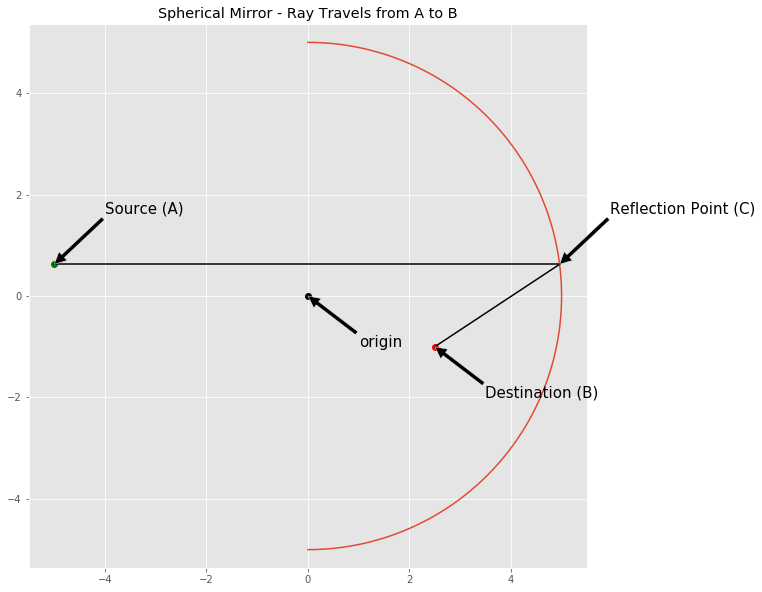

In [5]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.title('Spherical Mirror - Ray Travels from A to B')
plt.plot(mirror[:,0], mirror[:,1])

# origin
plt.annotate('origin', xy=(0, 0), xytext=(1, -1),
            arrowprops=dict(facecolor='black'), size = 15
            )
plt.plot(0,0,'ko')

#point A
plt.plot(source[0], source[1], 'go')
plt.annotate('Source (A)', xy=source, xytext=source + np.array((1,1)),
            arrowprops=dict(facecolor='black'), size = 15
            )

#point B
plt.plot(destination[0], destination[1], 'ro')
plt.annotate('Destination (B)', xy=destination, xytext=destination + np.array((1,-1)),
            arrowprops=dict(facecolor='black'), size = 15
            )

# ray
plt.plot([source[0], reflection[0]],
         [source[1], reflection[1]], 'k')
plt.plot([reflection[0], destination[0]],
         [reflection[1], destination[1]], 'k')
plt.annotate('Reflection Point (C)', xy=reflection, xytext=reflection + np.array((1,1)),
            arrowprops=dict(facecolor='black'), size = 15
            )

Consider a mirror, explain, focal point, calculate length

In [6]:
# distance form source to mirror + distance from mirror to destination
path_length = np.sqrt(np.sum((source - mirror)**2,axis=1)) +\
    np.sqrt(np.sum((mirror-destination)**2,axis=1))

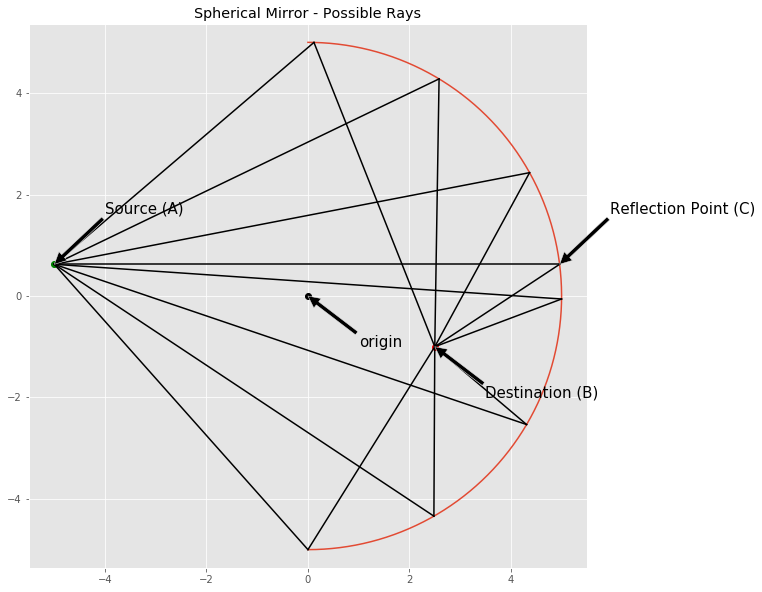

In [7]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.title('Spherical Mirror - Possible Rays')
plt.plot(mirror[:,0], mirror[:,1])

# origin
plt.annotate('origin', xy=(0, 0), xytext=(1, -1),
            arrowprops=dict(facecolor='black'), size = 15
            )
plt.plot(0,0,'ko')

#point A
plt.plot(source[0], source[1], 'go')
plt.annotate('Source (A)', xy=source, xytext=source + np.array((1,1)),
            arrowprops=dict(facecolor='black'), size = 15
            )

#point B
plt.plot(destination[0], destination[1], 'ro')
plt.annotate('Destination (B)', xy=destination, xytext=destination + np.array((1,-1)),
            arrowprops=dict(facecolor='black'), size = 15
            )

# ray
plt.plot([source[0], reflection[0]],
         [source[1], reflection[1]], 'k')
plt.plot([reflection[0], destination[0]],
         [reflection[1], destination[1]], 'k')
plt.annotate('Reflection Point (C)', xy=reflection, xytext=reflection + np.array((1,1)),
            arrowprops=dict(facecolor='black'), size = 15
            )

for i in range(0, len(mirror), len(mirror)//6):
    plt.plot([source[0], mirror[i,0]],
             [source[1], mirror[i,1]], 'k-')
    plt.plot([mirror[i,0], destination[0]],
             [mirror[i,1], destination[1]], 'k')


In [8]:
incident_angle = np.zeros(np.shape(theta))
reflected_angle = np.zeros(np.shape(theta))
for i, point in enumerate(mirror):
    to_A = source - point
    incident_angle[i] = np.arccos(np.dot(-point, to_A/norm(to_A))/norm(point))
    
    to_B = destination - point
    reflected_angle[i] = np.arccos(np.dot(-point/norm(point), to_B/norm(to_B)))

In [9]:
zeros = theta[np.argwhere(np.diff(np.sign(incident_angle - reflected_angle))).flatten()]

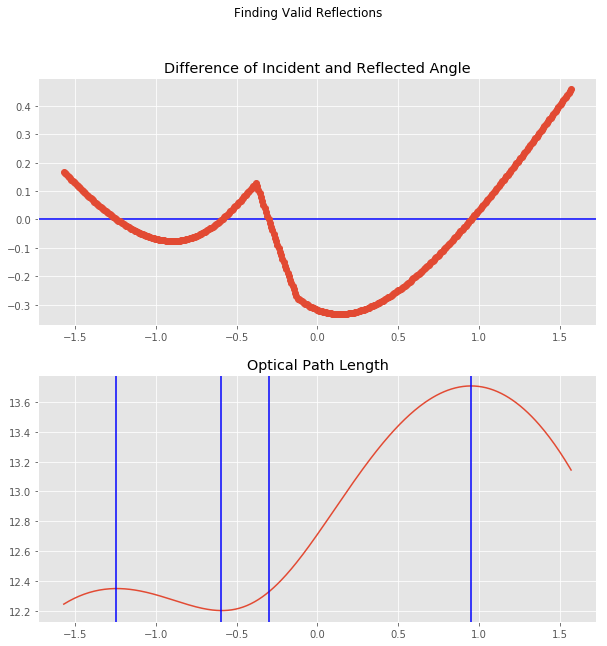

In [10]:
plt.figure(figsize=(10,10))
plt.suptitle('Finding Valid Reflections')
ax1 = plt.subplot(211)
ax1.axhline(0, color='blue')
ax1.set_title('Difference of Incident and Reflected Angle')
plt.plot(theta, incident_angle-reflected_angle, 'o')

# share x only
ax2 = plt.subplot(212, sharex=ax1)
ax2.set_title('Optical Path Length')
plt.plot(theta, path_length)

for zero in zeros:
    plt.axvline(zero, color='blue')

In [11]:
zeros

array([-1.24797603, -0.59446177, -0.30313613,  0.94877673])

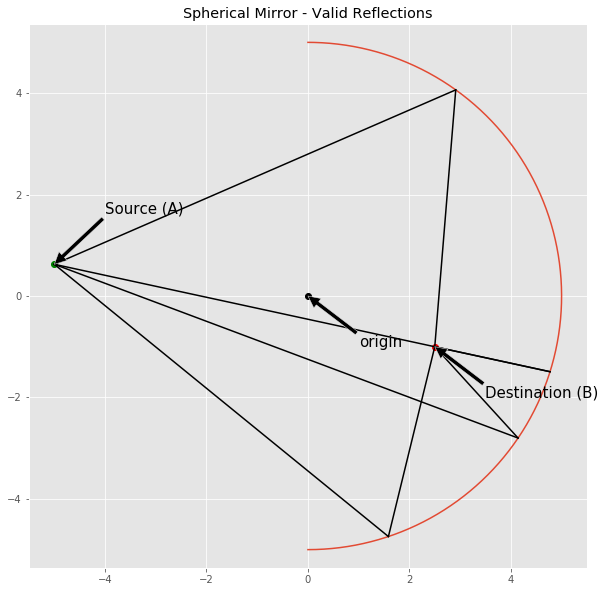

In [13]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'datalim')
plt.title('Spherical Mirror - Valid Reflections')
plt.plot(mirror[:,0], mirror[:,1])

# origin
plt.annotate('origin', xy=(0, 0), xytext=(1, -1),
            arrowprops=dict(facecolor='black'), size = 15
            )
plt.plot(0,0,'ko')

#point A
plt.plot(source[0], source[1], 'go')
plt.annotate('Source (A)', xy=source, xytext=source + np.array((1,1)),
            arrowprops=dict(facecolor='black'), size = 15
            )

#point B
plt.plot(destination[0], destination[1], 'ro')
plt.annotate('Destination (B)', xy=destination, xytext=destination + np.array((1,-1)),
            arrowprops=dict(facecolor='black'), size = 15
            )


for zero in zeros:
    plt.plot([source[0], sphere(zero, radius)[0]],
             [source[1], sphere(zero, radius)[1]], 'k-')
    plt.plot([sphere(zero, radius)[0], destination[0]],
             [sphere(zero, radius)[1], destination[1]], 'k')


In [ ]:
deriv = ((source[0]-radius*np.cos(theta))**2+(source[1]-radius*np.sin(theta))**2)**-0.5 +\
    (2*(source[0]-radius*np.cos(theta)) + 2*(source[1]-radius*np.sin(theta))) +\
    (2*radius*np.sin(theta) - 2*radius*np.cos(theta)) +\
    ((source[0]-radius*np.cos(theta))**2+(source[1]-radius*np.sin(theta))**2)**-0.5 +\
    (2*(source[0]-radius*np.cos(theta)) + 2*(source[1]-radius*np.sin(theta))) +\
    (2*radius*np.sin(theta) - 2*radius*np.cos(theta))
    

Conclusions, calculus of variations, cite BYO optics book, add reference to Jupyter tutorial